In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

### EDA

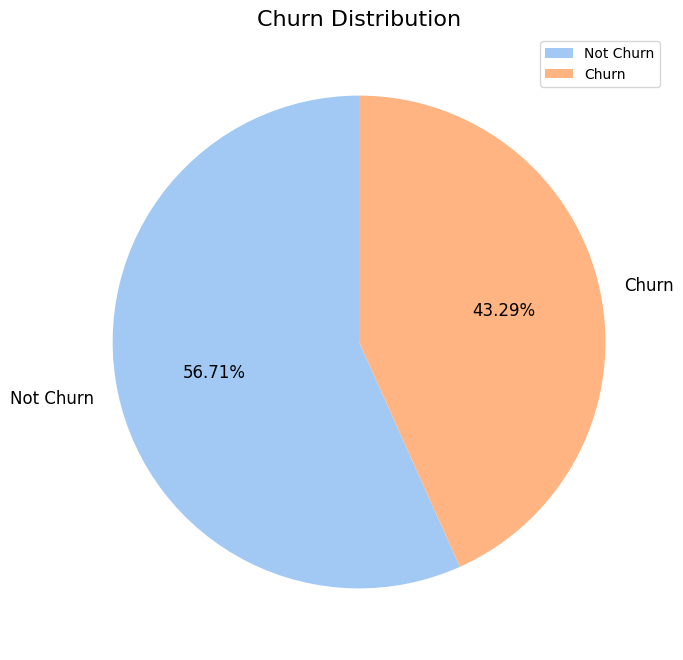

In [48]:
ch_counts = data['Churn'].value_counts()
total_count = len(data)
percentages = (ch_counts / total_count) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(ch_counts)]
plt.pie(ch_counts,labels=['Not Churn', 'Churn'], autopct='%.2f%%', startangle=90, colors=colors, textprops={'fontsize': 12})

# Add a title
plt.title('Churn Distribution', fontsize=16)
plt.legend()
# Show the plot
plt.show()

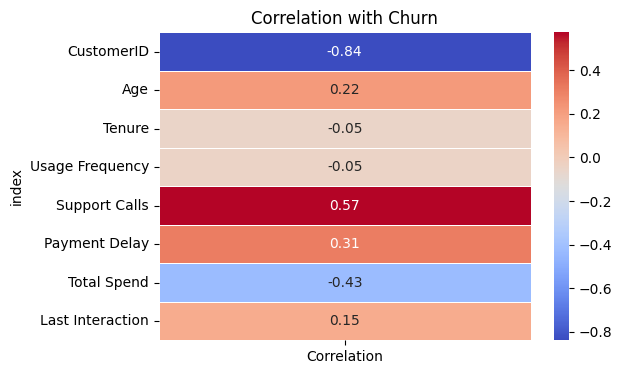

In [10]:
### Correlation 

# Calculate the correlation matrix
correlation_with_churn = data.corr(numeric_only=True)['Churn'].drop('Churn')  # Drop self-correlation

# Convert to DataFrame for visualization
correlation_df = correlation_with_churn.to_frame(name='Correlation').reset_index()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df.set_index('index'), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation with Churn')
plt.show()

Mean: 39.37315349157956
Min: 18.0
Max: 65.0
Median: 39.0


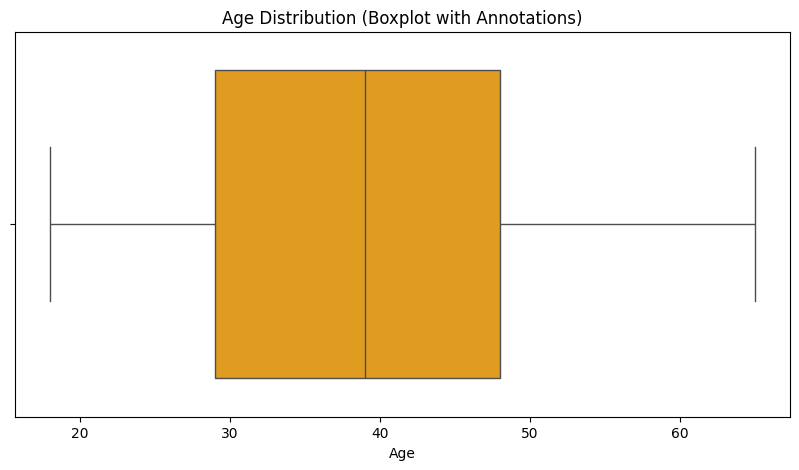

In [ ]:
# Create the figure
plt.figure(figsize=(10, 5))

# Draw the boxplot
box = sns.boxplot(x=data['Age'], color='orange')

# Calculate statistical values
min_val = data['Age'].min()
max_val = data['Age'].max()
median_val = data['Age'].median()
mean_val = data['Age'].mean()

print(f'Mean: {mean_val}')
print(f'Min: {min_val}')
print(f'Max: {max_val}')
print(f'Median: {median_val}')

# Add title and labels
plt.title('Age Distribution (Boxplot with Annotations)')
plt.xlabel('Age')

# Show the plot
plt.show()


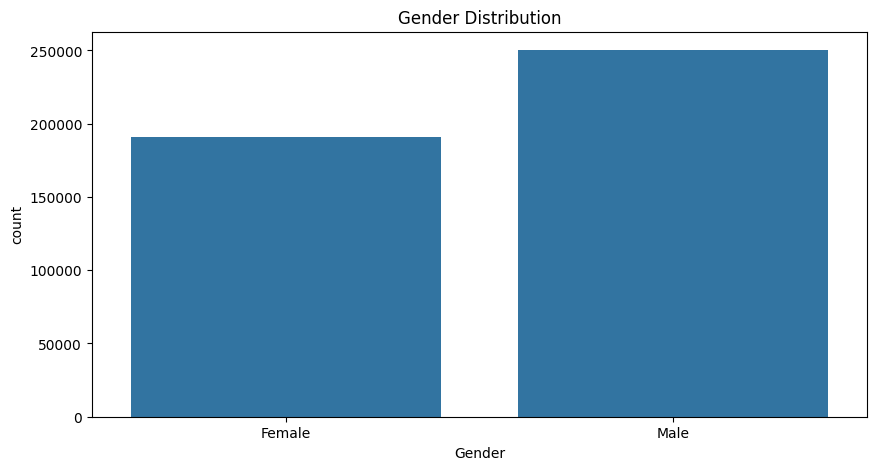

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

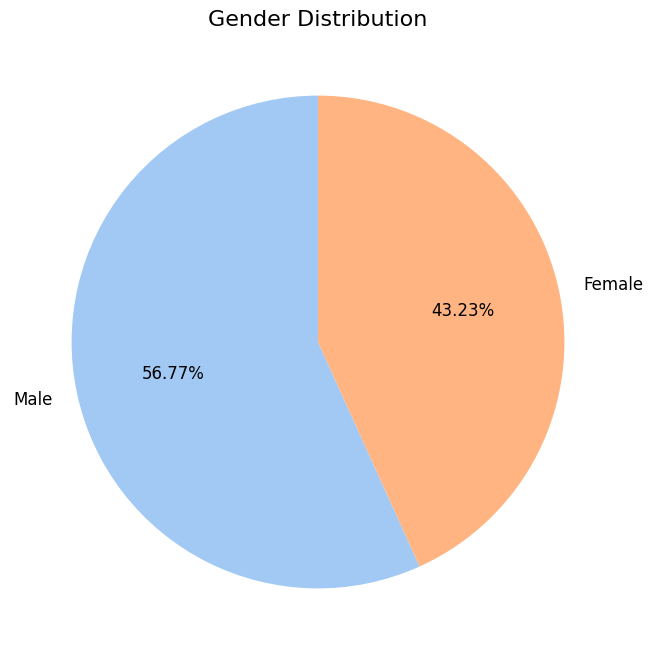

In [23]:
gender_counts = data['Gender'].value_counts()
total_count = len(data)
percentages = (gender_counts / total_count) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(gender_counts)]
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%', startangle=90, colors=colors, textprops={'fontsize': 12})

# Add a title
plt.title('Gender Distribution', fontsize=16)

# Show the plot
plt.show()

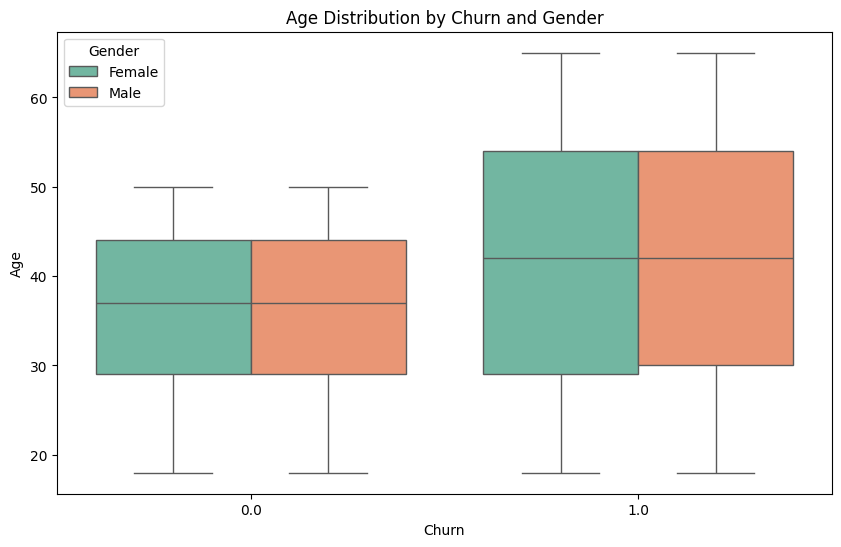

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Age', hue='Gender', data=data, palette='Set2')
plt.title('Age Distribution by Churn and Gender')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()


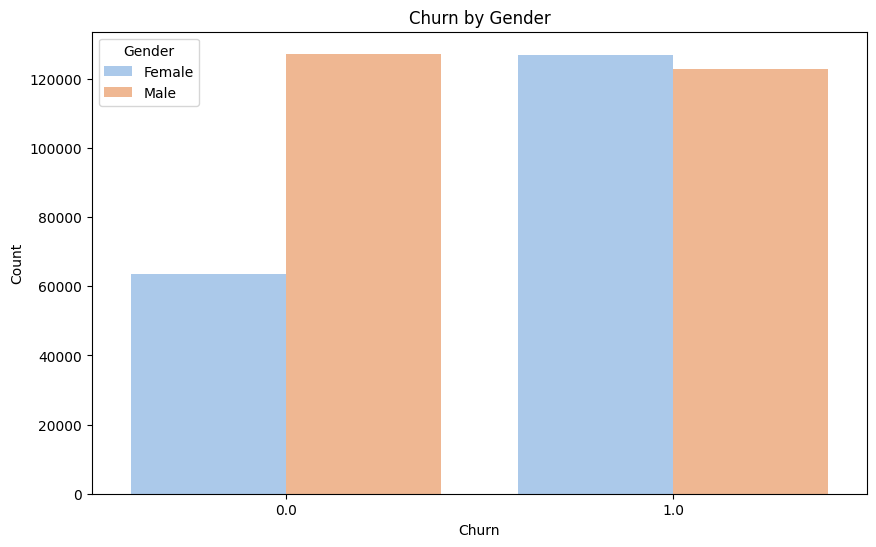

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', hue='Gender', data=data, palette='pastel')
plt.title('Churn by Gender')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


### Support Calls

/tmp/ipykernel_35417/2751691029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='Churn', y='Support Calls', palette='viridis')


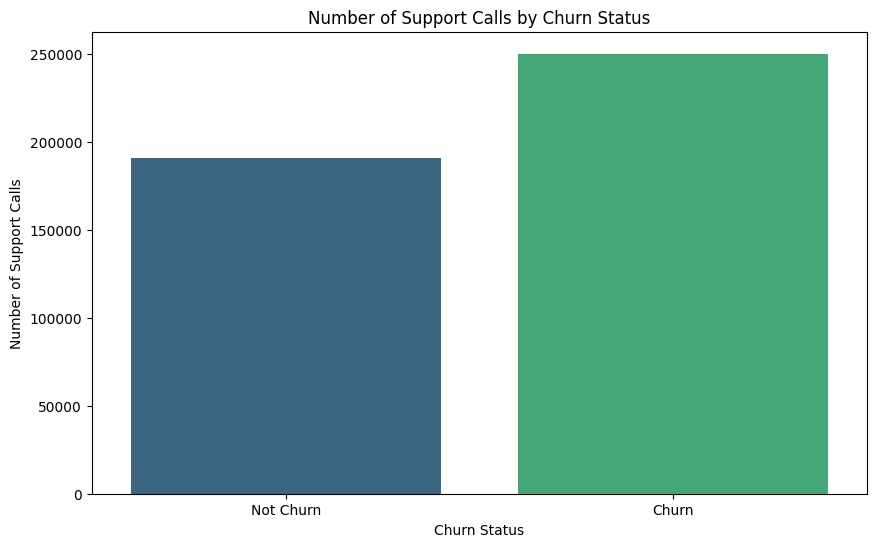

In [23]:
bar_data = data.groupby('Churn')['Support Calls'].count().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=bar_data, x='Churn', y='Support Calls', palette='viridis')
# Customizing the plot
plt.title('Number of Support Calls by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Support Calls')
plt.xticks([0, 1], ['Not Churn', 'Churn'])  # Label the x-axis categories
plt.show()

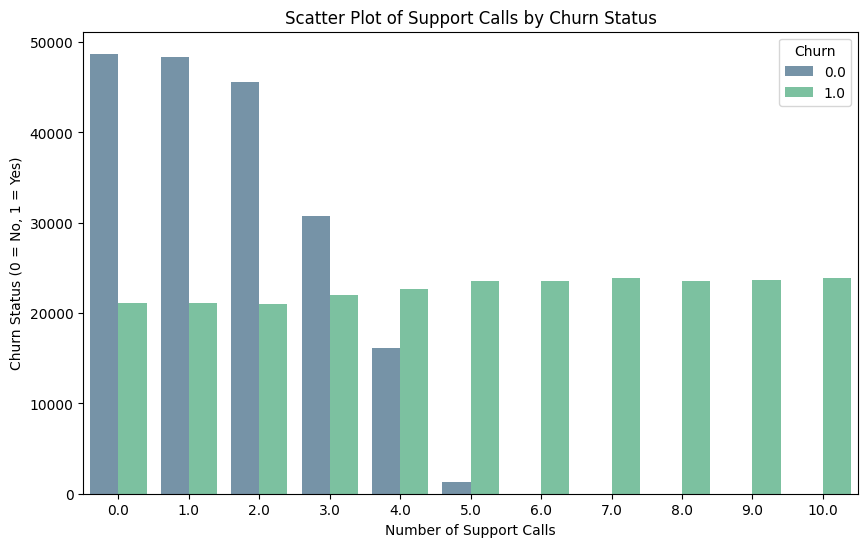

In [25]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(data=data, x='Support Calls', hue='Churn', palette='viridis', s=100, alpha=0.7)
sns.countplot(x='Support Calls', hue='Churn', data=data, palette='viridis', alpha=0.7)

# Customizing the plot
plt.title('Scatter Plot of Support Calls by Churn Status')
plt.xlabel('Number of Support Calls')
plt.ylabel('Churn Status (0 = No, 1 = Yes)')
plt.show()

/tmp/ipykernel_35417/3335237970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Payment Delay', data=data, palette='viridis')
/tmp/ipykernel_35417/3335237970.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


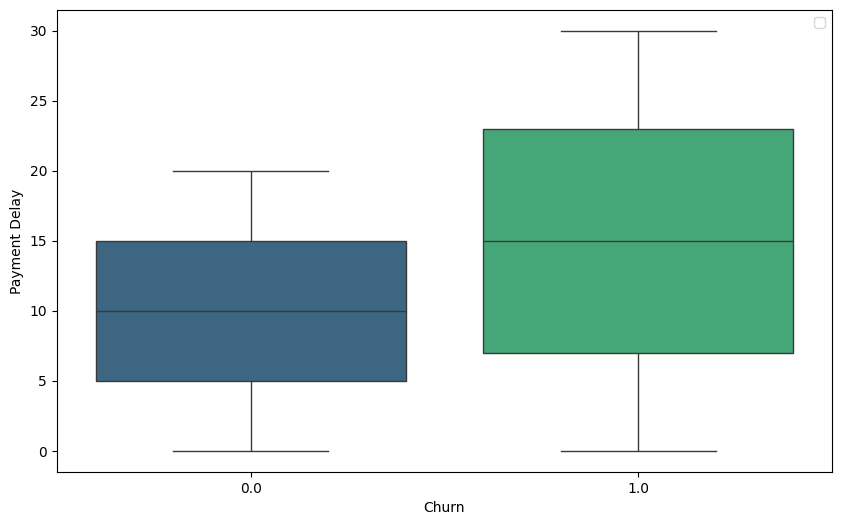

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Payment Delay', data=data, palette='viridis')
plt.legend()
plt.show()

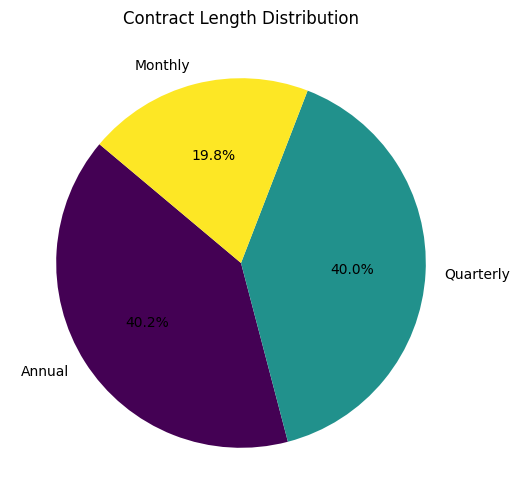

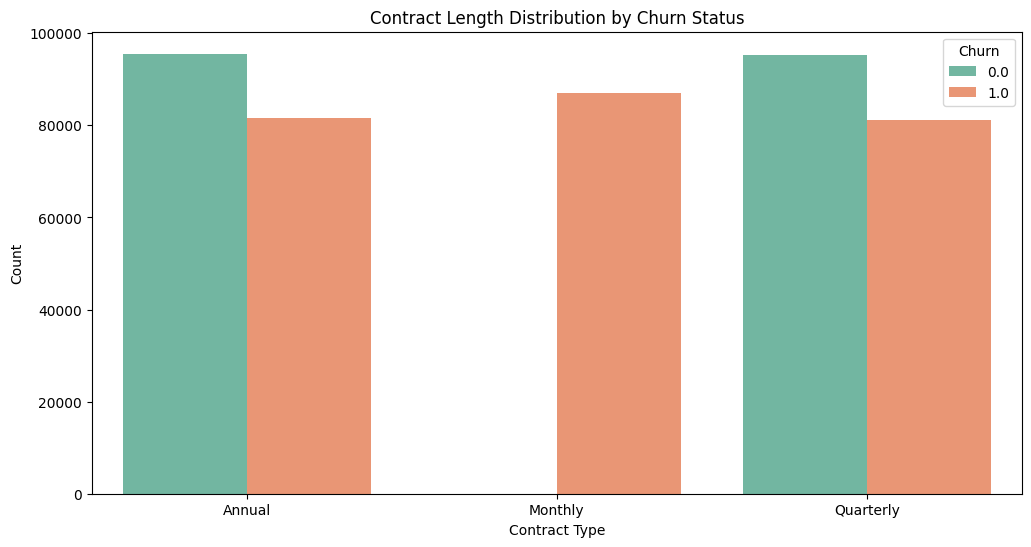

In [47]:
# Pie chart for the distribution of Subscription Types
plt.figure(figsize=(10, 6))
data['Contract Length'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Contract Length Distribution')
plt.ylabel('')  # Hide y-axis label
plt.show()

# Bar plot for churn distribution across subscription types
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Contract Length', hue='Churn', palette='Set2')
plt.title('Contract Length Distribution by Churn Status')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

### Data Preprocessing

In [3]:
# Make a pipeline to preprocess the data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [33]:
# Define the numerical columns
numerical_cols = ['Age', 'Tenure', 'Usage Frequency',
                  'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Define the categorical columns
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean for numerical data
            ('scaler', StandardScaler())  # Standardize the numerical features
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value for categorical data
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode the categorical features
        ]), categorical_cols)
    ])

# Apply the preprocessing pipeline to the data
# drop NaN values from the data
data_n = data.dropna(subset=['Churn'])

X = data_n.drop(columns=['Churn', 'CustomerID'])
y = data_n['Churn']

# Fit and transform the data
X_prep = preprocessor.fit_transform(X)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Tenure', 'Usage Frequency',
                                  'Support Calls', 'Payment Delay',
                                  'Total Spend', 'Last Interaction']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Subscription Type',
                                  'Contract Length'])])

In [34]:
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [35]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352665, 15), (88167, 15), (352665,), (88167,))

### Model development

In [36]:
### Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create the model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
# SAve the model

joblib.dump(log_reg, 'log_reg.pkl')


['log_reg.pkl']

In [37]:
from sklearn.metrics import classification_report

# Predict the labels on the test set
y_pred = log_reg.predict(X_test)

# Print evaluation metrics
print("Evaluation Metrics:")
print(classification_report(y_test, y_pred, digits=4))

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0     0.8590    0.9042    0.8810     38040
         1.0     0.9243    0.8873    0.9054     50127

    accuracy                         0.8946     88167
   macro avg     0.8916    0.8958    0.8932     88167
weighted avg     0.8961    0.8946    0.8949     88167



True Negatives (TN): 34397
False Positives (FP): 3643
False Negatives (FN): 5647
True Positives (TP): 44480


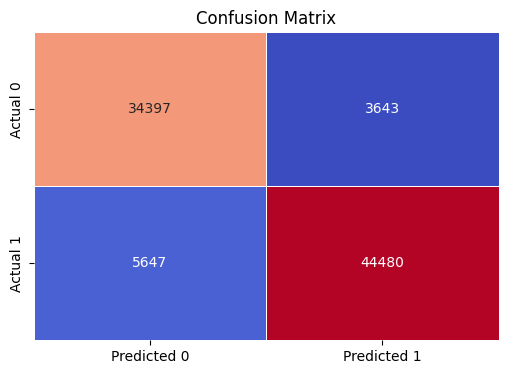

In [38]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


TN, FP, FN, TP = conf_matrix.ravel()

# Print the confusion matrix components
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')
print(f'True Positives (TP): {TP}')

# Create a DataFrame for the confusion matrix for visualization
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot=True, cmap='coolwarm', fmt='d', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.show()

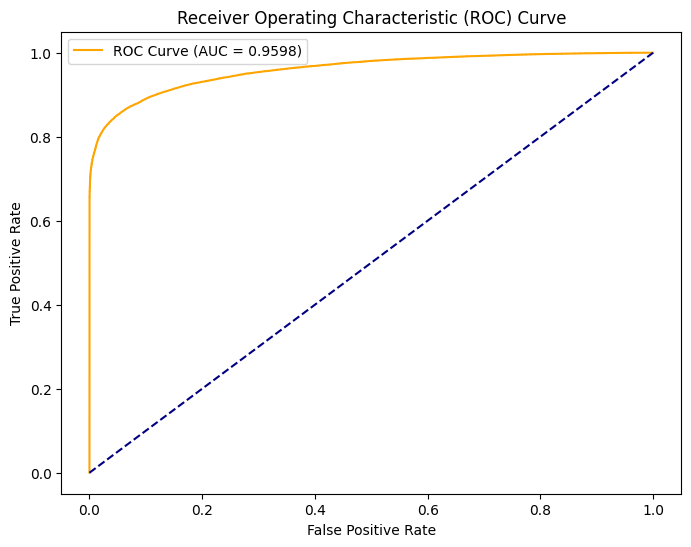

In [39]:
## Roc Curve

from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Random Forest Classifier

In [40]:
### Random Forest

from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(random_state=0)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred_rf = rf_model.predict(X_test)

# Print evaluation metrics
print("Evaluation Metrics:")
print(classification_report(y_test, y_pred_rf, digits=4))

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0     0.9982    0.9999    0.9991     38040
         1.0     0.9999    0.9987    0.9993     50127

    accuracy                         0.9992     88167
   macro avg     0.9991    0.9993    0.9992     88167
weighted avg     0.9992    0.9992    0.9992     88167



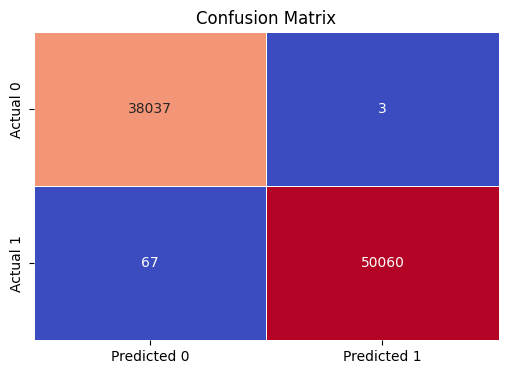

In [41]:
## confusion matrix

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame for the confusion matrix for visualization
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_df, annot=True, cmap='coolwarm', fmt='d', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.show()


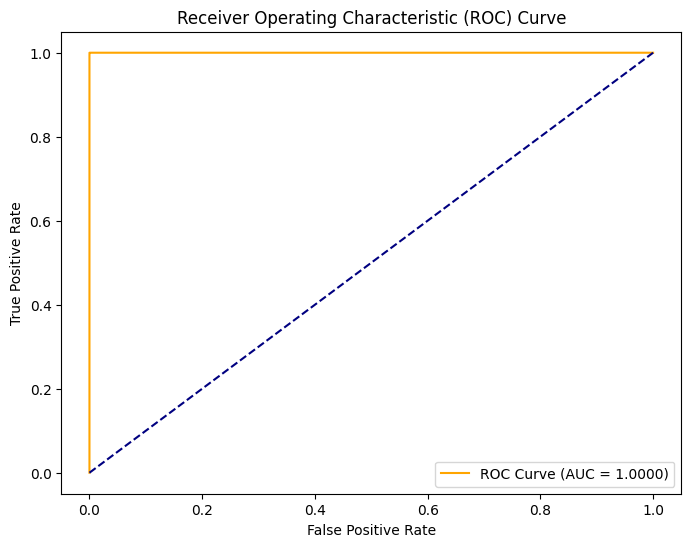

In [42]:
## auc curve

# Get the predicted probabilities
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Compute the AUC score
auc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', label=f'ROC Curve (AUC = {auc_score_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()